# Tables de hachage

## Librairies

In [46]:
import numpy as np

import matplotlib.pyplot as plt

## Classe

In [47]:
class TableHachage():

    def __init__(self, N, fct_hachage):

        self.N = N
        self.fct_hachage = fct_hachage
        self.table = [None]*N
        self.nb_collisions = 0
        
    def inserer(self, c):
        
        collision = True
        i = 0
        
        while collision:
            
            indice = self.fct_hachage(c, i)
            if self.table[indice] == None:
                self.table[indice] = c
                collision = False
            else:
                i += 1
                self.nb_collisions += 1

In [48]:
N = 1023

In [129]:
# suite de fcts hachage: f(c, i) = f_i(c)
def f1(c, i):
    return (c + i) % N

In [130]:
def f2(c, i):
    return (c + 3*i**2 + i) % N

In [131]:
def f3(c, i):
    return (c + 3*i**3 + 7*i**2 + 3*i) % N

## Expérience

In [132]:
N = 1023

In [121]:
def exp(f):

    collisions_ll = []
    
    for i in range(50):
    
        table = TableHachage(N, f)
        cles = np.random.choice(10000, size=N//2, replace=False)
    
        collisions_l = []
        
        for c in cles:
            
            table.inserer(c)
            collisions_l.append(table.nb_collisions)
    
        collisions_ll.append(collisions_l)

    return collisions_ll

In [122]:
collisions_ll_1 = exp(f1)
collisions_ll_2 = exp(f2)
collisions_ll_3 = exp(f3)

In [123]:
# np.array(collisions_ll_1)

In [124]:
collisions_mean_1 = np.mean(np.array(collisions_ll_1), axis=0)
collisions_mean_2 = np.mean(np.array(collisions_ll_2), axis=0)
collisions_mean_3 = np.mean(np.array(collisions_ll_3), axis=0)

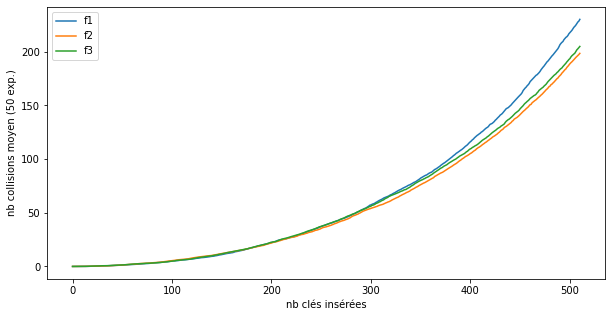

In [134]:
plt.figure(figsize=(10,5))

plt.plot(collisions_mean_1, label="f1")
plt.plot(collisions_mean_2, label="f2")
plt.plot(collisions_mean_3, label="f3")
plt.xlabel("nb clés insérées")
plt.ylabel("nb collisions moyen (50 exp.)")
plt.legend()

plt.show()